Exploratory Data Analysis (EDA)

Setting up the dataset repository

In [2]:
import math
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('diamonds.csv')
df.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,NaN,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,NaN,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,NaN,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,NaN,unknown,unknown,unknown,unknown,200


NULL values : 

In [4]:
df.isnull().sum()

Unnamed: 0                          0
cut                                 0
color                               0
clarity                             0
carat_weight                        0
cut_quality                         0
lab                                 0
symmetry                            0
polish                              0
eye_clean                           0
culet_size                          0
culet_condition                     0
depth_percent                       0
table_percent                       0
meas_length                         0
meas_width                          0
meas_depth                          0
girdle_min                          0
girdle_max                          0
fluor_color                         0
fluor_intensity                143491
fancy_color_dominant_color          0
fancy_color_secondary_color         0
fancy_color_overtone             1650
fancy_color_intensity               0
total_sales_price                   0
dtype: int64

We can see that there are no NULL values.

In [5]:
df.describe()

,Unnamed: 0,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,109851.747418,0.755176,61.683768,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,63423.264419,0.845894,9.915266,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,54925.500000,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,109852.000000,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,164777.500000,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,219703.000000,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


total_sales_price ranges from 200 to 144988. Also, MIN value for some attributes such as meas_length, meas_width, meas_depth are 0. Which is not possible, so we have to take care of that while prepocessing.

In [6]:
df.describe(include='O').T

,count,unique,top,freq
cut,219703,11,Round,158316
color,219703,11,E,33103
clarity,219703,11,SI1,38627
cut_quality,219703,6,Excellent,124861
lab,219703,3,GIA,200434
symmetry,219703,5,Excellent,131619
polish,219703,5,Excellent,175806
eye_clean,219703,5,unknown,156916
culet_size,219703,9,N,131899
culet_condition,219703,4,unknown,204384


In [3]:
df.columns

Index(['Unnamed: 0', 'cut', 'color', 'clarity', 'carat_weight', 'cut_quality',
       'lab', 'symmetry', 'polish', 'eye_clean', 'culet_size',
       'culet_condition', 'depth_percent', 'table_percent', 'meas_length',
       'meas_width', 'meas_depth', 'girdle_min', 'girdle_max', 'fluor_color',
       'fluor_intensity', 'fancy_color_dominant_color',
       'fancy_color_secondary_color', 'fancy_color_overtone',
       'fancy_color_intensity', 'total_sales_price'],
      dtype='object')

In [7]:
df.shape

(219703, 26)

Bos-plots :

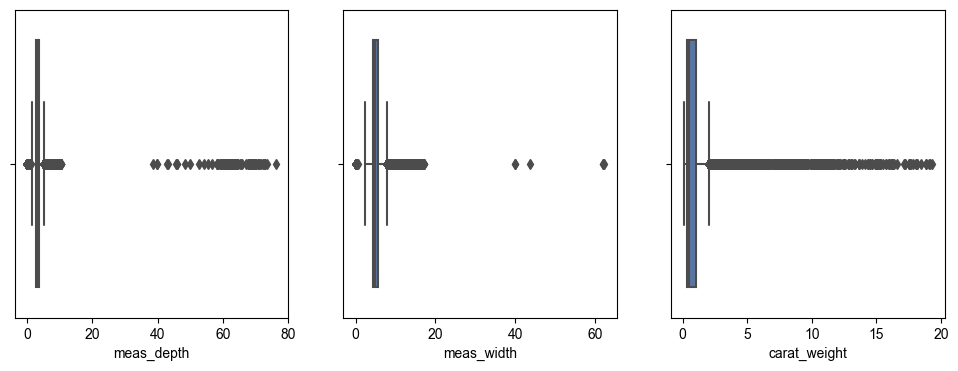

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))

sns.set_theme(style="whitegrid")
for axid, col in enumerate(["meas_depth", "meas_width", "carat_weight",]):
    sns.boxplot(x=df[col], ax=ax[axid])

Category wise Total sales price :

In [12]:
import plotly.express as px

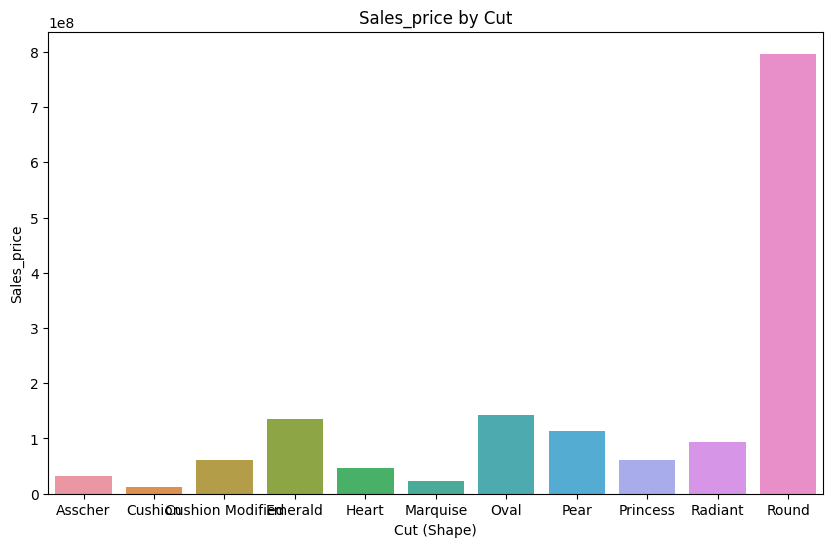

In [4]:
cut_sales = df.groupby('cut')['total_sales_price'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='cut', y='total_sales_price', data=cut_sales)
plt.title('Sales_price by Cut')
plt.xlabel('Cut (Shape)')
plt.ylabel('Sales_price')
plt.show()

In [17]:
color_sales = df.groupby('color')['total_sales_price'].sum().reset_index()
fig_segment = px.bar(color_sales, x='color', y='total_sales_price')
fig_segment.update_layout(title='Sales_price by Cut', xaxis_title='cut (Shape)', yaxis_title='Sales_price')
fig_segment.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Pairwise Plots :


C:\Users\Ishita\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:118: UserWarning:

The figure layout has changed to tight



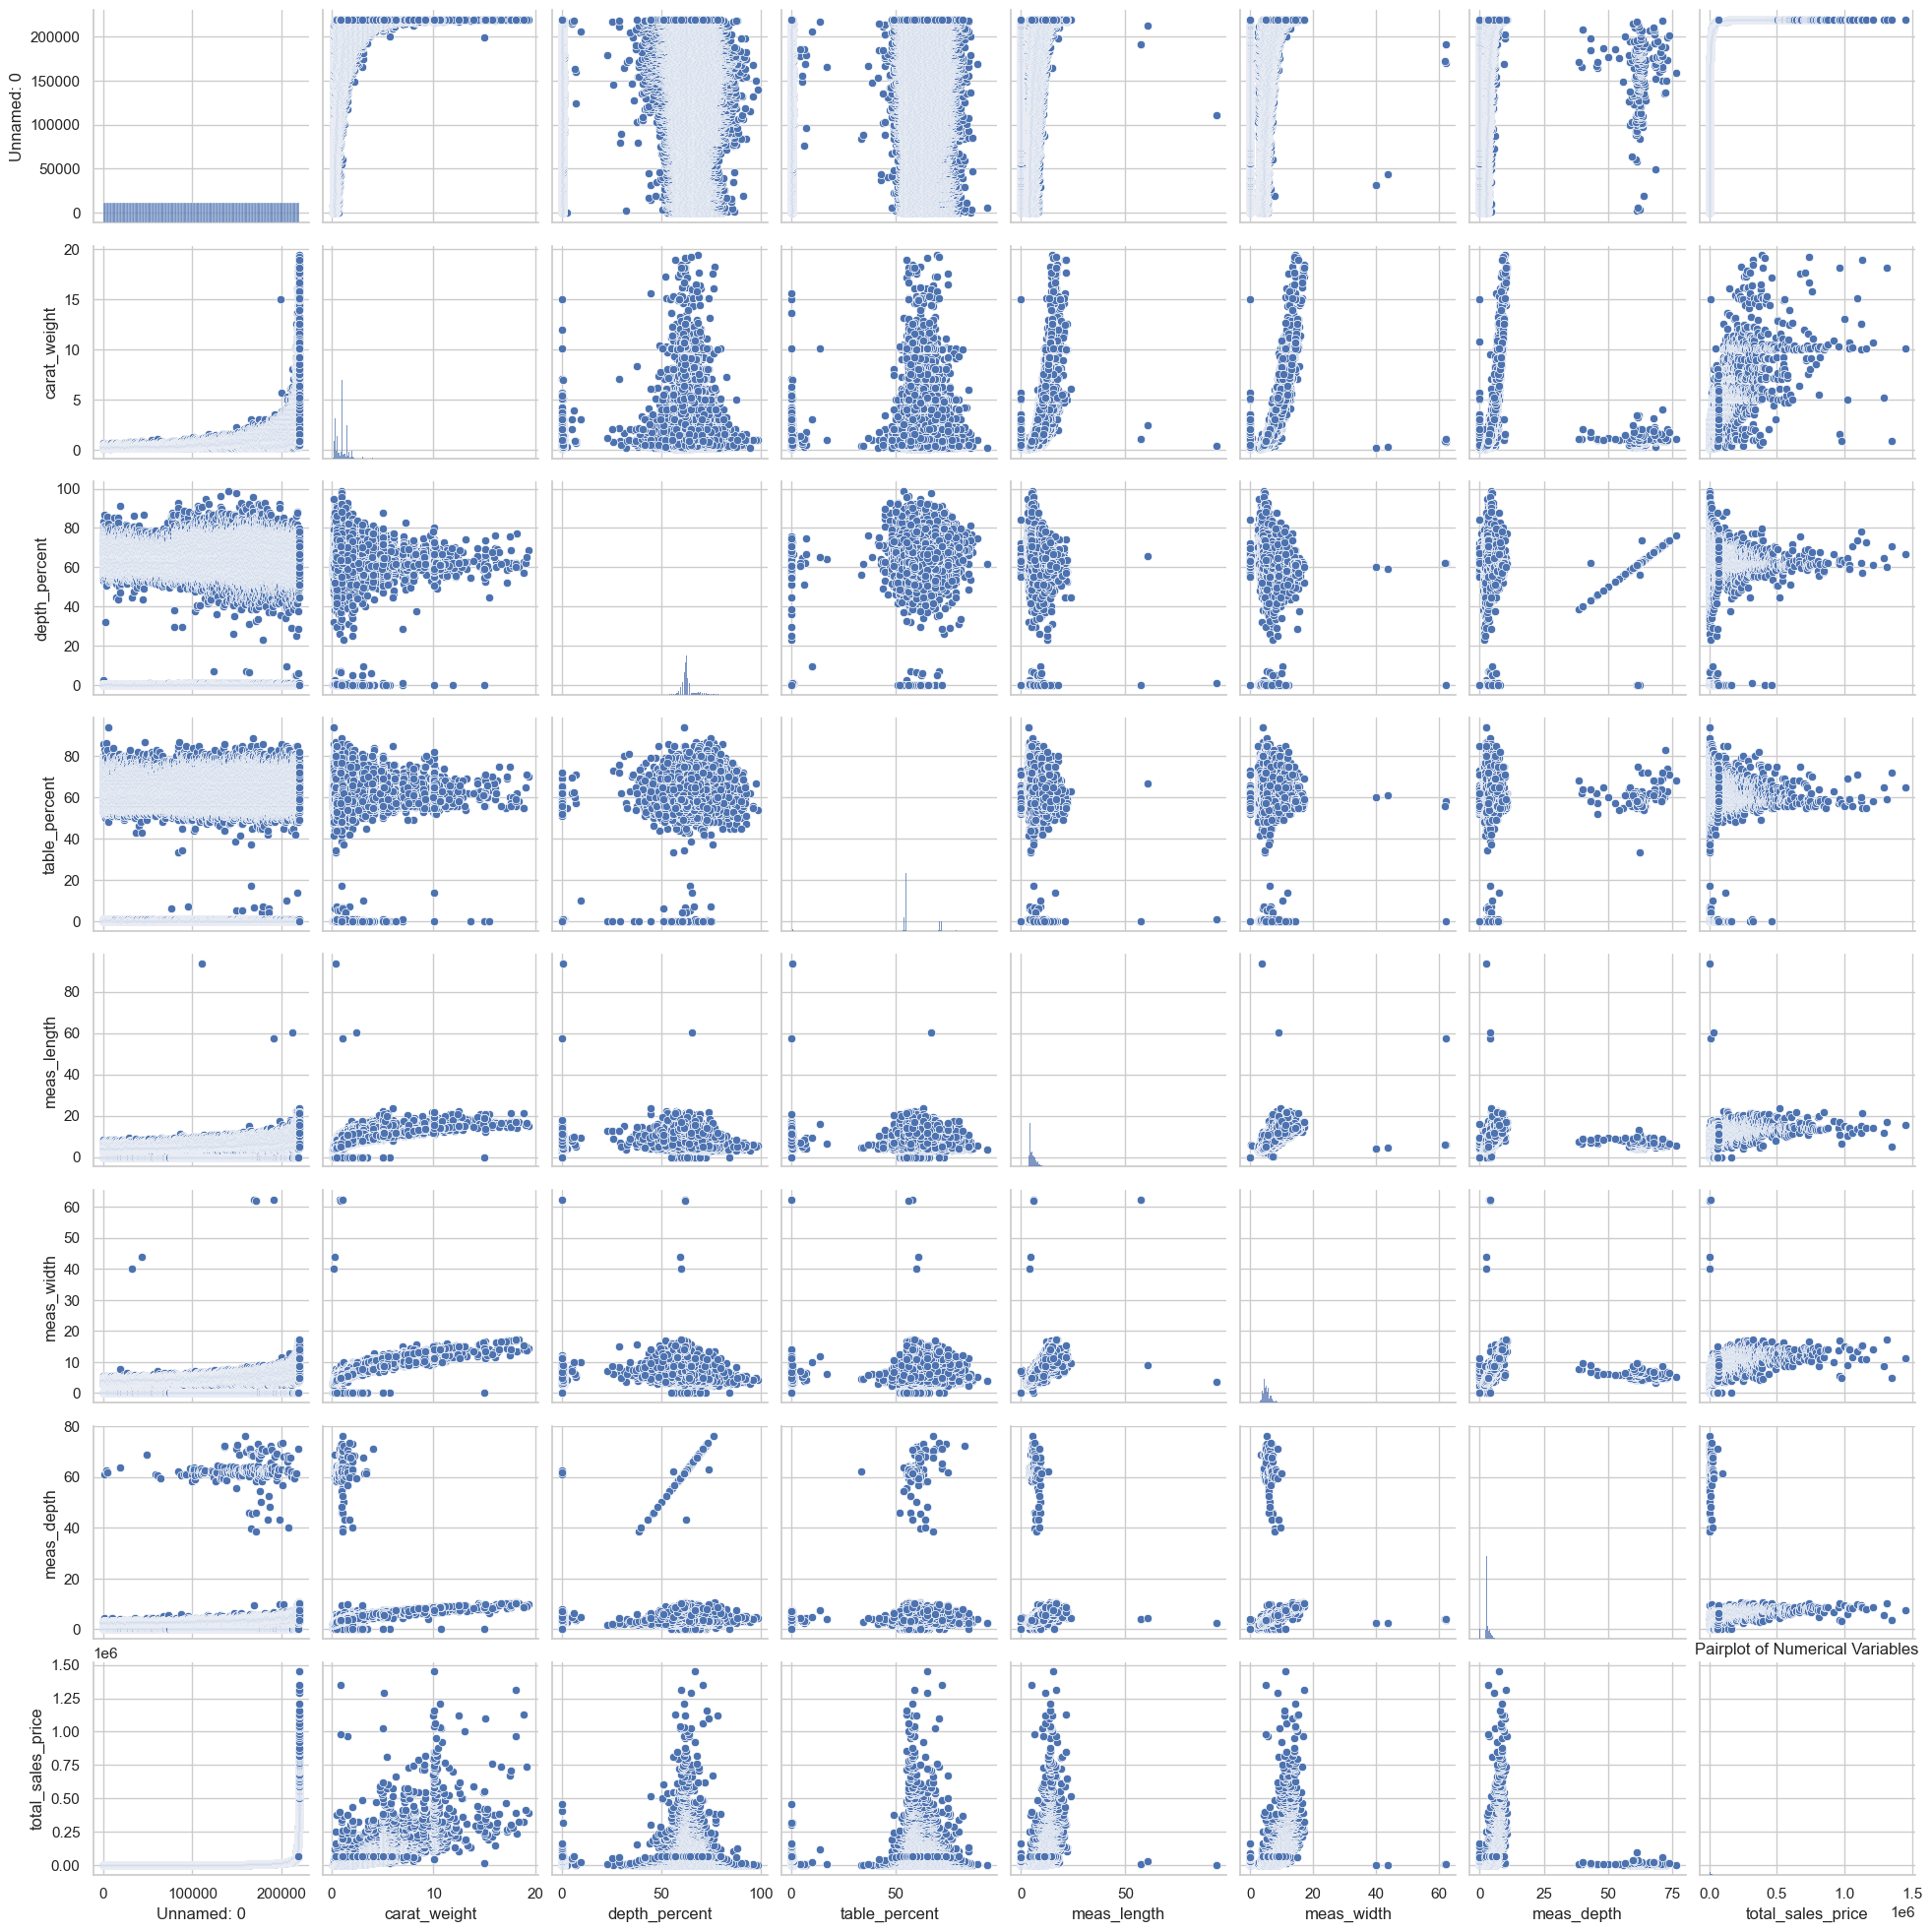

In [18]:
sns.pairplot(df)
plt.title('Pairplot of Numerical Variables')
plt.show()

Pie-charts :

<Axes: ylabel='count'>

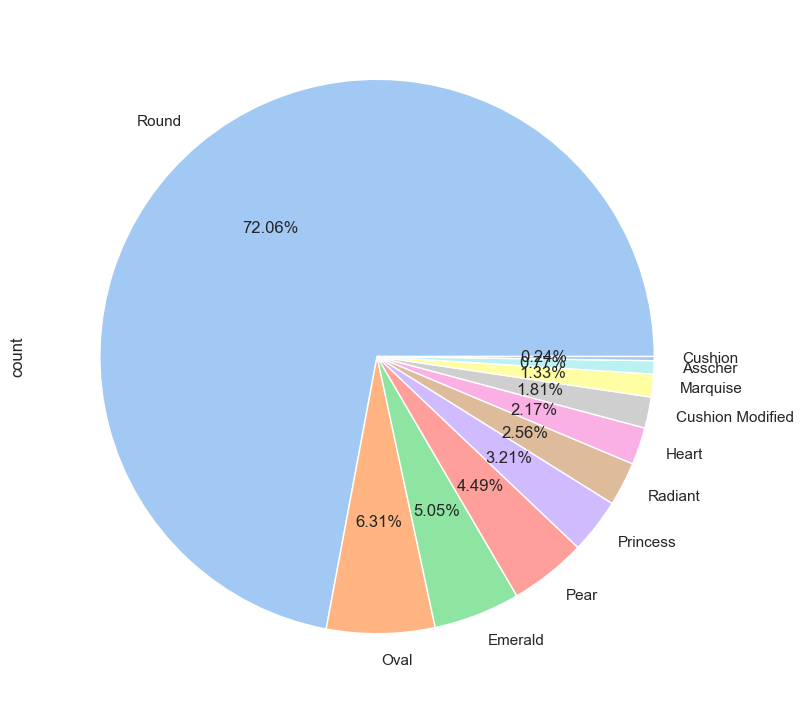

In [19]:
cut_counts = df["cut"].value_counts()
piec_colors = sns.color_palette('pastel')[0:len(cut_counts)]
plt.figure(figsize=(9, 9))
cut_counts.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

<Axes: ylabel='count'>

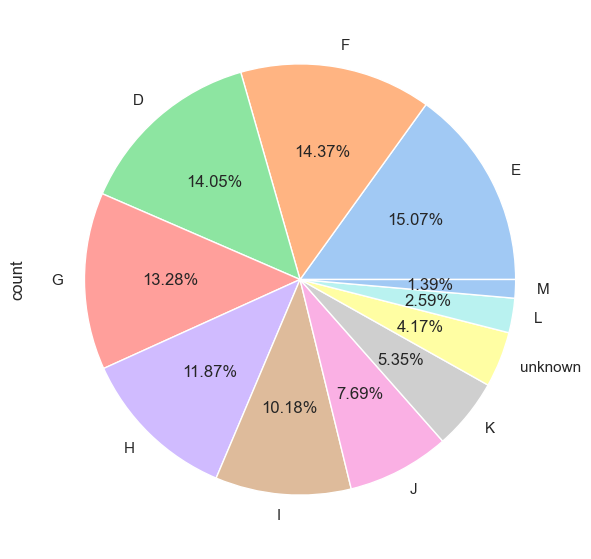

In [20]:
color_counts = df["color"].value_counts()
piec_colors = sns.color_palette('pastel')[0:len(color_counts)]
plt.figure(figsize=(7, 7))
color_counts.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

<Axes: ylabel='count'>

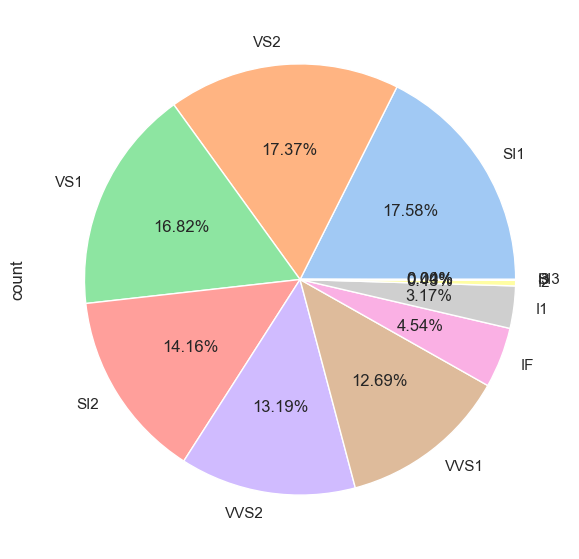

In [21]:
clarity_counts = df["clarity"].value_counts()
piec_colors = sns.color_palette('pastel')[0:len(clarity_counts)]
plt.figure(figsize=(7, 7))
clarity_counts.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

<Axes: ylabel='count'>

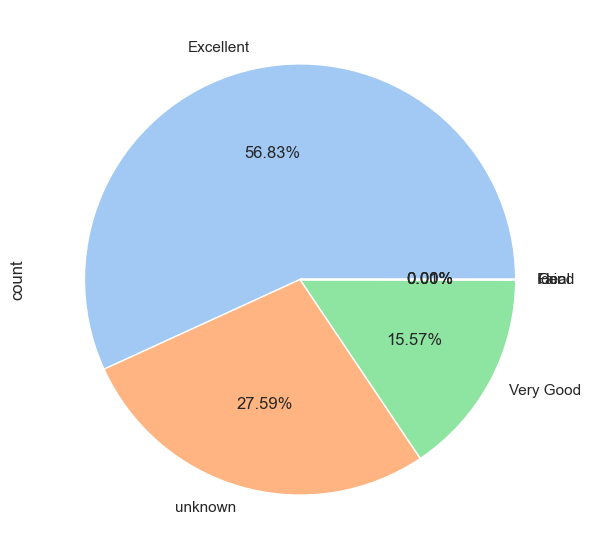

In [22]:
quality_counts = df["cut_quality"].value_counts()
piec_colors = sns.color_palette('pastel')[0:len(quality_counts)]
plt.figure(figsize=(7, 7))
quality_counts.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

<Axes: ylabel='count'>

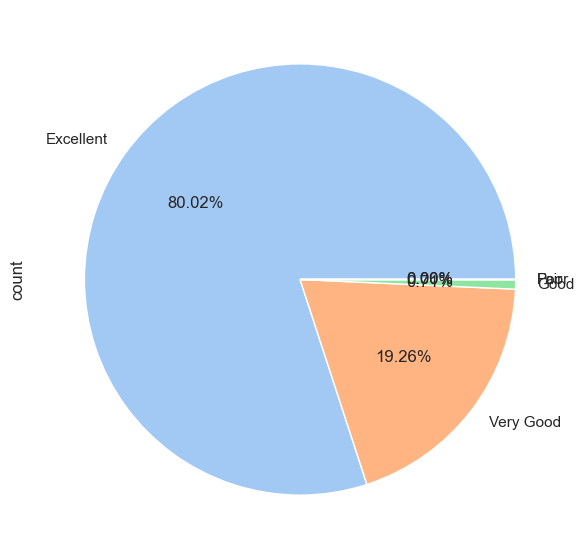

In [23]:
polish_counts = df["polish"].value_counts()
piec_colors = sns.color_palette('pastel')[0:len(polish_counts)]
plt.figure(figsize=(7, 7))
polish_counts.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%')

<Axes: xlabel='cut', ylabel='total_sales_price'>

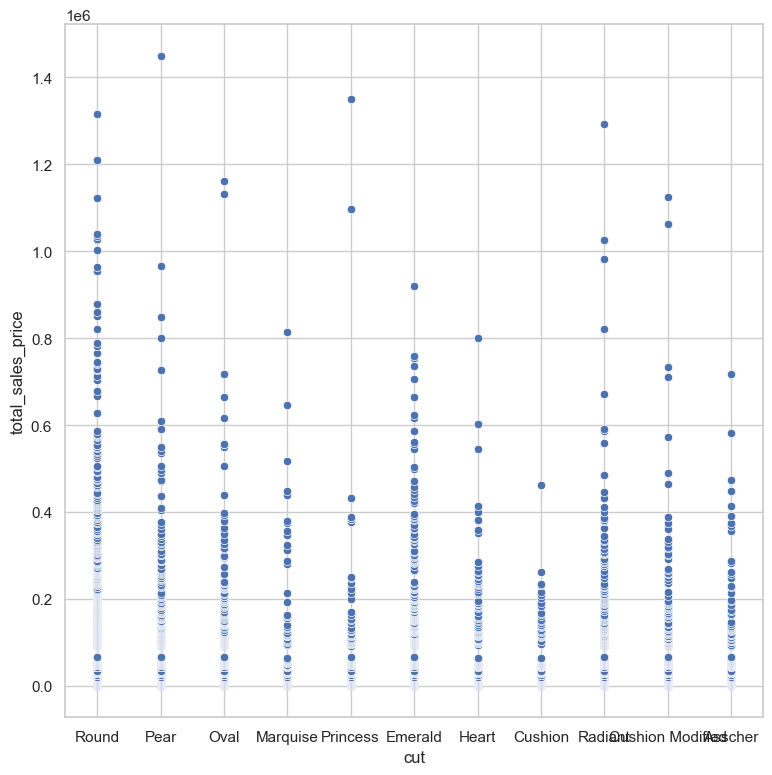

In [24]:
plt.figure(figsize=(9, 9))
sns.scatterplot(x=df["cut"], y=df["total_sales_price"])

Here, we can say that almost all types (shapes) of diamonds has minimum 200k total_sales_price. Tatal sales price varies a lot for particularly 'Round' shape diamond.

<Axes: xlabel='carat_weight', ylabel='total_sales_price'>

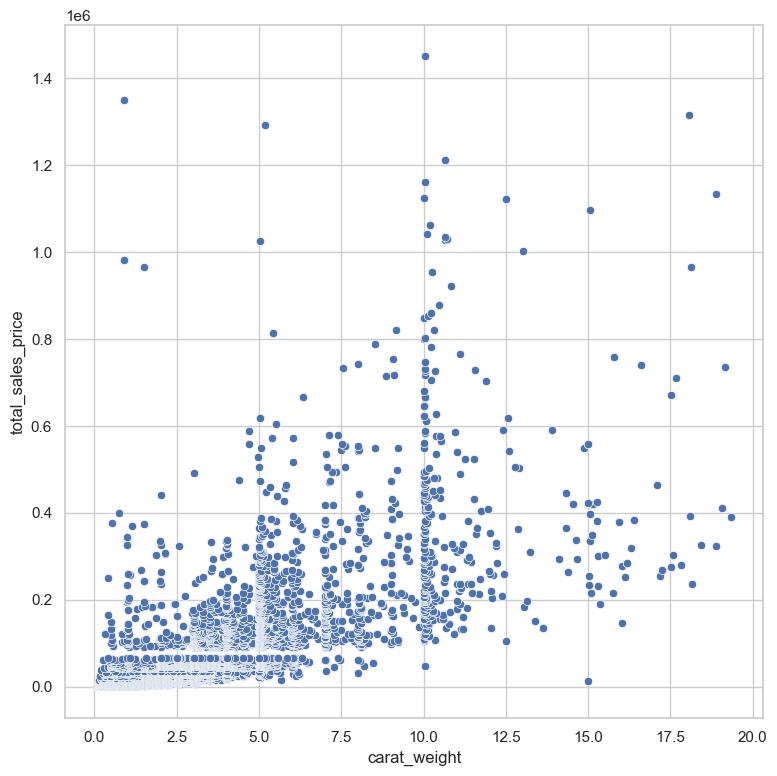

In [25]:
plt.figure(figsize=(9, 9))
sns.scatterplot(x=df["carat_weight"], y=df["total_sales_price"])

By this plot, it is evident that it seems that there is vertical line at carat weight of 10. So, diamonds of carat weight of 10 has very vast range of sales price.

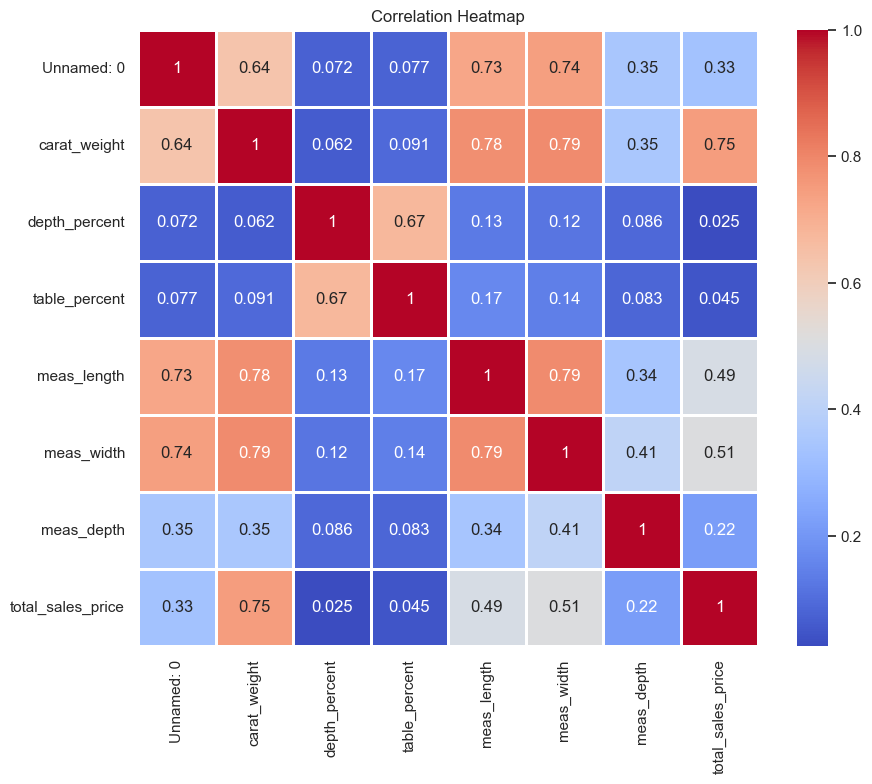

In [32]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=1)
plt.title("Correlation Heatmap")
plt.show()


Total_sales_price is highly correlated with carat weight, meas_length and meas_width.

carat weight is highly correlated with meas_length and meas_width.

depth percent and table precemt are highly correlated.